# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

Ames is a city in Story County, Iowa, United States, located approximately 30 miles (48 km) north of Des Moines in central Iowa. 
It is best known as the home of Iowa State University (ISU), with leading agriculture, 
design, engineering, and veterinary medicine colleges.In 2020, Ames had a population of 66,772 .

This project analyses the housing dataset of Ames in Iowa, USA. The dataset is obtained from Kaggle[Link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data). 
People often invest in remodelling to increase value of the house and don't get much return on investment when selling the house. Likewise, people looking to buy houses want to get the best house within their budget. 

I will use the housing data collected from Kaggle to build a Linear Regression model that best predicts sale prices for properties located in Ames.

# Executive Summary

This dataset provides 80 features (of nominal, discrete, and ordinal types) to describe properties in Ames, Iowa that were sold between the years 2006-2010. During the first step in the analysis - data cleaning, missing values were fixed, incorrect data types were fixed, and any unsual values were also investigated and fixed. Once the data was cleaned, Exploratory Data Analysis (EDA) was conducted to explore the relationship between Sale Price and each feature in the model. For numeric features, the linear relationship was examined using a heatmap and correlation coefficients. For categorical data, bar plots were created to visualize the mean Sale Price across categories. 
Following EDA, features were engineered to reduce dimensionality of the data and to account for the patterns and clusters that emerged during EDA. Categorical variables of were encoded. 
During modeling, three models were built:  a Linear Regression, Ridge Regression and Lasso Regression. The models were compared based on R2 score, and the highest scoring model was selected for further evaluation using RMSE and residuals plots. Interpretations and recommendations were made based off of the best-performing model.

Based on the findings,

Square feet area, property age, Overall conditions and location are the most important determinant factors of Saleprice.

Best locations are - Northridge Heights, Stone Brook and Northridge.

People looking to sell should do it sooner rather than later.

To increase the value of a home:
- Renovate the kitchen
- Remodel the interior and exterior finish
- Add fireplace(if not present)
- Renovate Garage
- Renovate house if not in good condition


# Contents

* [Imports](#Imports)
* [Read-in data](#Read-in-Data)
* [Data Dictionary](#Data-Dictionary)
* [Data Cleaning](#Data-Cleaning)
  * [Check Shape](#Check-Shape)
  * [Check Missing Values](#Check-Missing-Values)
  * [Missing Values in both Datasets](#Missing-Values-in-both-Datasets)
  * [Handling Missing Values](#Handling-Missing-Values)







# Imports

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Read-in Data

In [2]:
#Read the train and test csvs
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

# Data Dictionary

Data dictioanary can be found [here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data).

# Data Cleaning

In [3]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Check Shape

In [4]:
#Get shape of data
print(train_df.shape)
print(test_df.shape)

(2051, 81)
(879, 80)


In [5]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
train_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

### Check Missing Values

In [7]:
#Check for missing values of train dataset
train_df.isnull().sum().sort_values(ascending = False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [8]:
#Check for missing values of test dataset
test_df.isnull().sum().sort_values(ascending = False).head(30)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Sale Type           0
dtype: int64

### Missing Values in both Datasets

In [9]:
#Find all the missing values in both train and test dataset
train_df_missing = pd.isna(train_df).sum()
test_df_missing = pd.isna(test_df).sum()
missing = pd.concat([train_df_missing, test_df_missing], axis = 1, keys = ['Train','Test'])

missing_values = missing[missing.sum(axis = 1)>0]
missing_values 


,Train,Test
Lot Frontage,330,160.0
Alley,1911,821.0
Mas Vnr Type,22,1.0
Mas Vnr Area,22,1.0
Bsmt Qual,55,25.0
Bsmt Cond,55,25.0
Bsmt Exposure,58,25.0
BsmtFin Type 1,55,25.0
BsmtFin SF 1,1,0.0
BsmtFin Type 2,56,25.0


## Handling Missing Values

In [10]:
#Analysing the missing values
# PoolQC: Pool quality
#Ex Excellent, Gd Good,T A Average/Typical, Fa Fair, NA No Pool
#Here we could see that missing value represents that there is no Pool in the property. 
train_df['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [11]:
#Alley: Type of alley access to property
print(train_df['Alley'].unique())
#BsmtQual: Height of the basement
train_df['Bsmt Qual'].unique()
#BsmtCond: General condition of the basement
train_df['Bsmt Cond'].unique()

[nan 'Pave' 'Grvl']


array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

### Meaningful Missing

In [12]:
#From above we could see that some of the categorical features whose missing values are meaningful by looking at the description of data.
# For example missing value in 'PoolQC' represents that there is no Pool in the property
#All the null values in Bsmt related varaibles are missing because there is no basement. 
#Therefore will replace all the missing values with 0 or None
# BsmtFin Type 2     55
# Bsmt Exposure      55
# Bsmt Cond          55
# Bsmt Qual          55
# BsmtFin Type 1     55
meaningful_missing = ["Alley", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", 
                    "BsmtFin Type 2", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual", 
                    "Garage Cond", "Fence","Pool QC", "Misc Feature"]

In [13]:
#Fill the null values of meaningful missing columns with 'None'
for i in meaningful_missing:
    train_df[i].fillna("None", inplace=True)
    test_df[i].fillna("None", inplace=True)

In [14]:
#Preview changes
train_df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,None,IR1,HLS,...,0,0,None,None,None,0,9,2007,WD,135000


### Lot Frontage

In [15]:
# LotFrontage: Linear feet of street connected to property
# For LotFrontage, we will assume that if it is NaN, then there is 0 feet of property connected to the street
train_df['Lot Frontage'].fillna(0, inplace=True)
test_df['Lot Frontage'].fillna(0, inplace=True)

In [16]:
train_df.isnull().sum().sort_values(ascending =False)

Garage Yr Blt     114
Mas Vnr Area       22
Mas Vnr Type       22
Bsmt Full Bath      2
Bsmt Half Bath      2
                 ... 
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Id                  0
Length: 81, dtype: int64

### Garage 

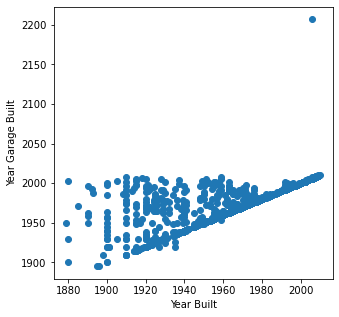

In [17]:
#The graph below shows that most garages were built the same time as the houses, 
#with some garages built later than the house
#It also shows an outlier, upon further analysis found to be typo
plt.figure(figsize=(5, 5))
plt.scatter(train_df['Year Built'], train_df['Garage Yr Blt'])
plt.xlabel('Year Built')
plt.ylabel('Year Garage Built')
plt.show()

In [18]:
train_df['Garage Yr Blt'].sort_values(ascending = False).head()

1699    2207.0
144     2010.0
1241    2010.0
589     2009.0
1796    2009.0
Name: Garage Yr Blt, dtype: float64

In [19]:
#Analyse the typo garage yr blt
train_df.loc[train_df['Garage Yr Blt'] == 2207.0][['Year Built','Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
1699,2006,2007,2207.0


In [20]:
train_df.iloc[1699][['Year Built','Year Remod/Add','Garage Yr Blt']]

Year Built        2006
Year Remod/Add    2007
Garage Yr Blt     2207
Name: 1699, dtype: object

In [21]:
#Drop the row with corrupted value
train_df.drop(train_df.loc[train_df['Garage Yr Blt'] == 2207.0].index, inplace = True)


In [22]:
# Impute GarageYrBlt: wherever GarageYrBlt is null or 0, replace it with the year the house was built
train_df.loc[train_df['Garage Yr Blt'].isnull(), 'Garage Yr Blt']= train_df['Year Built']
test_df.loc[test_df['Garage Yr Blt'].isnull(), 'Garage Yr Blt']= test_df['Year Built']

In [23]:
#GarageCars: Size of garage in car capacity
train_df['Garage Cars'].isnull().sum()

1

In [24]:
#GarageArea: Size of garage in square feet
train_df['Garage Area'].isnull().sum()


1

In [25]:
#Garage Area and Garage Cars is null when Garage cond is None(meaning no garage)
#Therefore will impute all other null values with 0
train_df['Garage Cars'].fillna(0, inplace =True)
train_df['Garage Area'].fillna(0, inplace =True)

test_df['Garage Cars'].fillna(0, inplace =True)
test_df['Garage Area'].fillna(0, inplace =True)

In [26]:
train_df.isnull().sum().sort_values(ascending = False)

Mas Vnr Type      21
Mas Vnr Area      21
Bsmt Full Bath     2
Bsmt Half Bath     2
Bsmt Unf SF        1
                  ..
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Id                 0
Length: 81, dtype: int64

### Masonry

In [27]:
#Fill missing values for MasVnrType with "none"
train_df['Mas Vnr Type'].fillna("None", inplace=True)
test_df['Mas Vnr Type'].fillna("None", inplace=True)
#Fill missing values for MasVnrArea with 0
train_df['Mas Vnr Area'].fillna(0, inplace=True)
test_df['Mas Vnr Area'].fillna(0, inplace=True)

In [28]:
# Has 22 missing values. For rows where 'Mas veneer type' is NaN, is  'Mas Veneer Area' missing also?
train_df[train_df['Mas Vnr Type'].isnull()==True]['Mas Vnr Area']
# The below results show this is true

Series([], Name: Mas Vnr Area, dtype: float64)

In [29]:
#Check other null values
train_df[train_df.isnull().any(axis=1)]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,4,2008,ConLD,79000


### Basement Baths

In [30]:
#Check for Bsmt Full Bath and Bsmt Half Bath
train_df[train_df['Bsmt Full Bath'].isnull()][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin SF 1','BsmtFin Type 2','Bsmt Unf SF','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF']]


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Bsmt Full Bath,Bsmt Half Bath,Total Bsmt SF
616,None,None,None,None,0.0,0.0,None,0.0,NaN,NaN,0.0
1327,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN


In [31]:
#we could see that Bsmt Full Bath and Bsmt Half Bath is null for no basement(Bsmt Cond is none, meaning no basement)
#Garage Area and Garage Cars is null when Garage cond is None(meaning no garage)
#Therefore will impute all other null values will None and 0
train_df['Bsmt Full Bath'].fillna(0, inplace =True)
train_df['Bsmt Half Bath'].fillna(0, inplace =True)
train_df['Total Bsmt SF'].fillna(0, inplace =True)
train_df['BsmtFin SF 2'].fillna(0, inplace =True)
train_df['Bsmt Unf SF'].fillna(0, inplace =True)
train_df['BsmtFin SF 1'].fillna(0, inplace =True)

test_df['Bsmt Full Bath'].fillna(0, inplace =True)
test_df['Bsmt Half Bath'].fillna(0, inplace =True)
test_df['Total Bsmt SF'].fillna(0, inplace =True)
test_df['BsmtFin SF 2'].fillna(0, inplace =True)
test_df['Bsmt Unf SF'].fillna(0, inplace =True)
test_df['BsmtFin SF 1'].fillna(0, inplace =True)



In [32]:
#Check if there is basement when there is nan values in Bsmt Half Bath
train_df[train_df['Bsmt Half Bath'].isnull()==True][['Bsmt Full Bath','Bsmt Half Bath','Bsmt Exposure']]

,Bsmt Full Bath,Bsmt Half Bath,Bsmt Exposure


In [33]:
train_df['BsmtBaths'] = train_df['Bsmt Full Bath']+train_df['Bsmt Half Bath']
train_df['Baths'] = train_df['Full Bath']+train_df['Half Bath']
train_df = train_df.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis=1)

test_df['BsmtBaths'] = test_df['Bsmt Full Bath']+test_df['Bsmt Half Bath']
test_df['Baths'] = test_df['Full Bath']+test_df['Half Bath']
test_df = test_df.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis=1)

In [34]:
#Check for null values
train_df.isnull().sum().sum()

0

### Electrical

In [35]:
# pd.set_option('display.max_rows', 100)
test_df['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [36]:
test_df['Electrical'] = test_df['Electrical'].fillna(0)

In [37]:
#Check for null values
train_df.isnull().sum().sum()

0

### Porch Area

Text(0, 0.5, 'Sale Price')

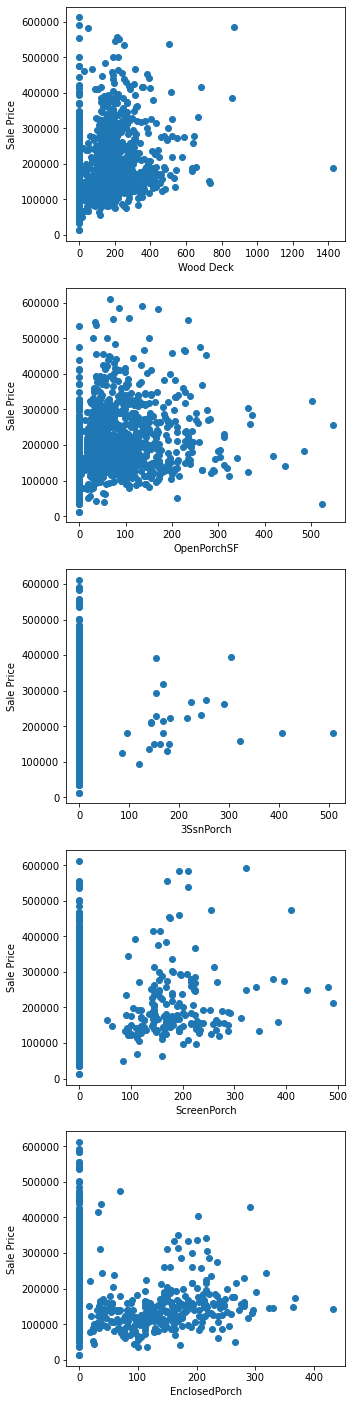

In [38]:
# Porch Area - how does each of the porch areas vary with Sale Price?
# From the graphs, it looks like the more porches of each type below that the property has, 
# the higher the Sale Price
fig = plt.figure(figsize=(5, 25))

axplot1 = fig.add_subplot(5, 1, 1)
axplot1.scatter(train_df['Wood Deck SF'], train_df['SalePrice'])
axplot1.set_xlabel('Wood Deck')
axplot1.set_ylabel('Sale Price')

axplot2 = fig.add_subplot(5, 1, 2)
axplot2.scatter(train_df['Open Porch SF'],train_df['SalePrice'])
axplot2.set_xlabel('OpenPorchSF')
axplot2.set_ylabel('Sale Price')

axplot3 = fig.add_subplot(5, 1, 3)
axplot3.scatter(train_df['3Ssn Porch'], train_df['SalePrice'])
axplot3.set_xlabel('3SsnPorch')
axplot3.set_ylabel('Sale Price')

axplot4 = fig.add_subplot(5, 1, 4)
axplot4.scatter(train_df['Screen Porch'], train_df['SalePrice'])
axplot4.set_xlabel('ScreenPorch')
axplot4.set_ylabel('Sale Price')

axplot5 = fig.add_subplot(5, 1, 5)
axplot5.scatter(train_df['Enclosed Porch'], train_df['SalePrice'])
axplot5.set_xlabel('EnclosedPorch')
axplot5.set_ylabel('Sale Price')

In [39]:
#As there are many features indicating the porch area, will combine all ceate a new variable
# OpenPorchSF: Open porch area in square feet
# WoodDeckSF: Wood deck area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet 

train_df['zero'] = 0
train_df['HasPorch'] = 0
#Check if the property has Porch area
train_df.loc[((train_df['Wood Deck SF']>train_df['zero']) | (train_df['Open Porch SF']>train_df['zero']) | (train_df['3Ssn Porch']>train_df['zero']) | 
        (train_df['Screen Porch']>train_df['zero']) | (train_df['Enclosed Porch']>train_df['zero'])), 'HasPorch'] = 1  
#Combine all the porch area and store in TotalPorchArea
train_df['TotalPorchArea'] = train_df['Wood Deck SF'] + train_df['Open Porch SF'] + train_df['3Ssn Porch'] +train_df['Screen Porch'] + train_df['Enclosed Porch']

test_df['zero'] = 0
test_df['HasPorch'] = 0

test_df['TotalPorchArea'] = test_df['Wood Deck SF'] + test_df['Open Porch SF'] + test_df['3Ssn Porch'] +test_df['Screen Porch'] + train_df['Enclosed Porch']


### Property_age

In [40]:
#Create new column as Property age
train_df['Property_age'] = train_df['Yr Sold'] - train_df['Year Built'] 
test_df['Property_age'] = test_df['Yr Sold'] - test_df['Year Built']

In [41]:
# Drop unwanted variables as we have already consolidated these types together

train_df = train_df.drop(['PID','Misc Val','Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch','BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2','zero'], 
    axis = 1)

test_df = test_df.drop(['PID','Misc Val','Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch','BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2','zero'], 
    axis = 1)

In [42]:
train_df.shape

(2050, 71)

In [43]:
test_df.shape

(879, 70)

In [44]:
# train_df.to_csv('train_df_clean.csv', index = False)
# test_df.to_csv('test_df_clean.csv', index = False)